# Exercise 10
In order to generate the data, adjust the compiler CXX in the Makefile, then issue 'make all'. Once the program is compiled, run the 'run.sh' script.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_Q01 = np.loadtxt("data_Q0d1.txt")
data_Q01_speeds = np.loadtxt("data_Q0d1_speeds.txt")
data_Q1 = np.loadtxt("data_Q1.txt")
data_Q1_speeds = np.loadtxt("data_Q1_speeds.txt")
data_Q10 = np.loadtxt("data_Q10.txt")
data_Q10_speeds = np.loadtxt("data_Q10_speeds.txt")
data_Q100 = np.loadtxt("data_Q100.txt")
data_Q100_speeds = np.loadtxt("data_Q100_speeds.txt")
data_Q1000 = np.loadtxt("data_Q1000.txt")
data_Q1000_speeds = np.loadtxt("data_Q1000_speeds.txt")

# Temperature Evolution

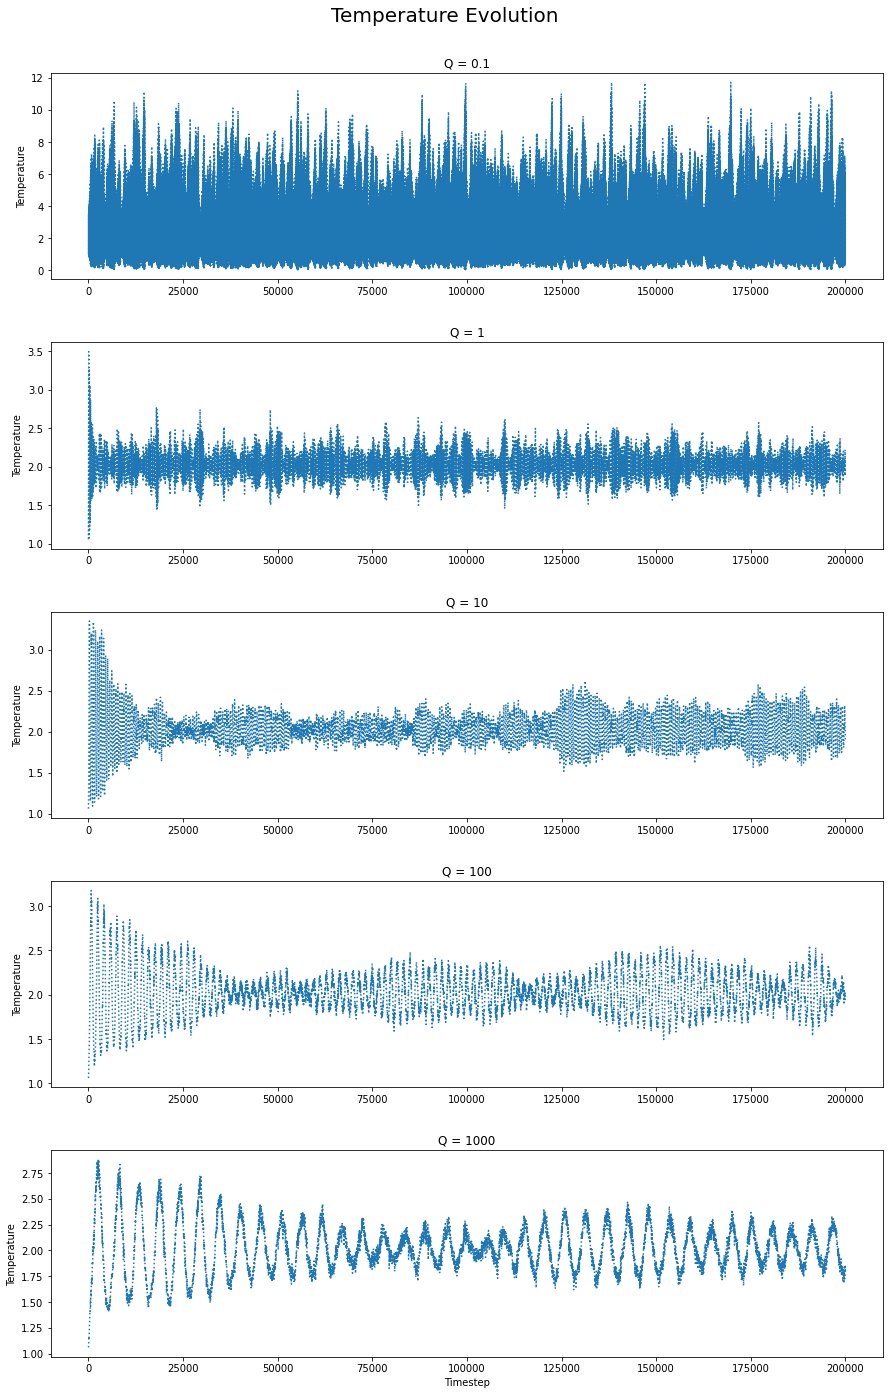

In [33]:
fig = plt.figure(figsize=(13,20))
ax = fig.subplots(5,1)
plt.suptitle("Temperature Evolution", fontsize=20)
ax[0].plot(data_Q01[:,1],':')
ax[0].set_title("Q = 0.1")
ax[0].set_ylabel("Temperature")
ax[1].plot(data_Q1[:,1],':')
ax[1].set_title("Q = 1")
ax[1].set_ylabel("Temperature")
ax[2].plot(data_Q10[:,1],':')
ax[2].set_title("Q = 10")
ax[2].set_ylabel("Temperature")
ax[3].plot(data_Q100[:,1],':')
ax[3].set_title("Q = 100")
ax[3].set_ylabel("Temperature")
ax[4].plot(data_Q1000[:,1],':')
ax[4].set_title("Q = 1000")
ax[4].set_ylabel("Temperature")
ax[4].set_xlabel("Timestep")
fig.tight_layout(pad=3.0)

## Interpretation
We expect the systems to equilibrate towards their target temperature (2 in this case). This is what we observe for all choices of Q (bar Q = 0.1), with some differences. For Q = 1, equilibration is fastest, while for Q = 1000 equilibration is achieved only after a much larger number of timesteps.

The interpretation here is that for increasing Q, we couple less and less strongly to the heat bath such that the equilibration time increases. The dynamics induced by Q are more complicated, though, and depend on other factors as well (such as natural frequencies present in the system).

For Q=0.1 we observe no equilibration, the temperature keeps swinging wildly between T = 0 and T = 10. The coupling to the heatbath is so strong that velocities are changed more rapidly than what the timestep chosen can resolve. This yields a feedback loop that won't settle down.

# Energy Histogram

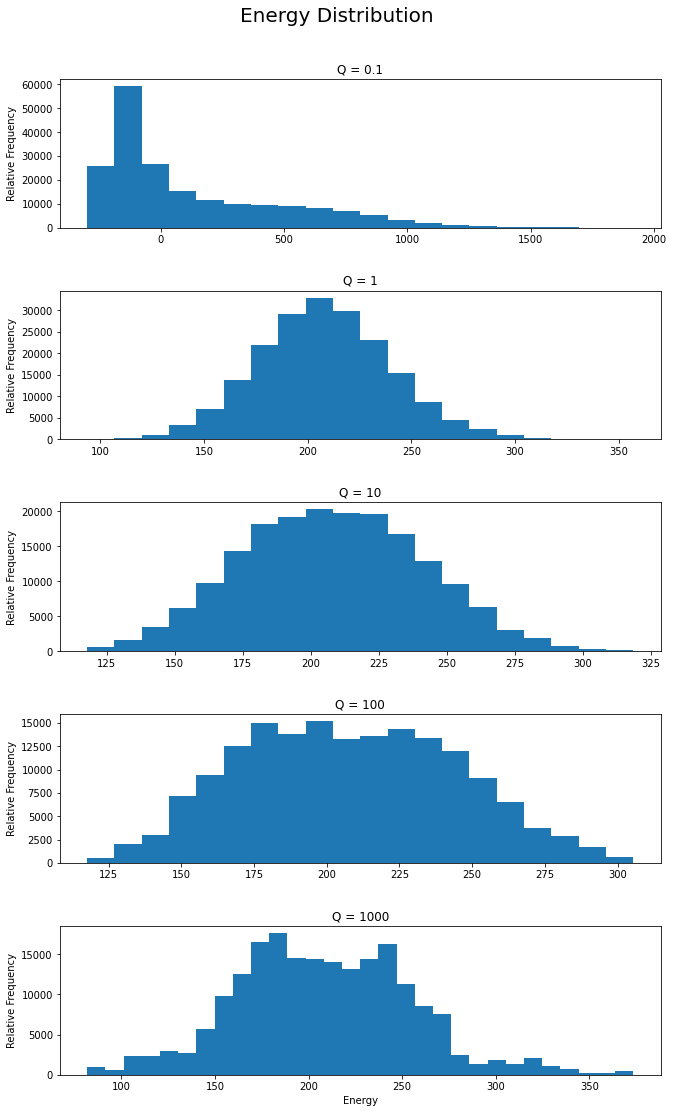

In [30]:
fig = plt.figure(figsize=(10,16))
ax = fig.subplots(5,1)
plt.suptitle("Energy Distribution", fontsize=20)
ax[0].hist(data_Q01[5000:,0],bins=20)
ax[0].set_title("Q = 0.1")
ax[0].set_ylabel("Relative Frequency")
ax[1].hist(data_Q1[5000:,0],bins=20)
ax[1].set_title("Q = 1")
ax[1].set_ylabel("Relative Frequency")
ax[2].hist(data_Q10[15000:,0],bins=20)
ax[2].set_title("Q = 10")
ax[2].set_ylabel("Relative Frequency")
ax[3].hist(data_Q100[30000:,0],bins=20)
ax[3].set_title("Q = 100")
ax[3].set_ylabel("Relative Frequency")
ax[4].hist(data_Q1000[:,0],bins=30)
ax[4].set_title("Q = 1000")
ax[4].set_ylabel("Relative Frequency")
ax[4].set_xlabel("Energy")
fig.tight_layout(pad=3.0)

## Interpretation

What we want to see in a canonical ensemble is a Gaussian-ish distribution of the energies around the "target temperature energy". For Q=1 this is what we find. For greater values of Q, the distribution first starts to flatten and then splits into a two-peak distribution, a signature of sustained oscillation between two energies (see dynamics above).

For Q=0.1, the dynamics induced by the heatbath are too fast for the used timestep, so we get garbage.

# Temperature Fluctuations
As was shown in the lecture, for a system of $N$ particles in $d$ dimensions at a target temperature $T$ we expect to see temperature fluctuations given by

$$\large \overline{\Delta T} = \sqrt{\frac{2}{Nd}}\overline{T}$$

In [17]:
target_fluct = np.sqrt(2/(125 * 3))*2.
print(f"Desired temperature: 2. +/- {target_fluct:.2}")
fluct_01 = np.std(data_Q01[1000:,1])
print(f"Temperature for Q=0.1: {np.mean(data_Q01[5000:,1]):.2} +/- {fluct_01:.2} (fluctuation error: {abs(fluct_01-target_fluct)/target_fluct:.3}%)")
fluct_1 = np.std(data_Q1[5000:,1])
print(f"Temperature for Q=1: {np.mean(data_Q1[5000:,1]):.2} +/- {fluct_1:.2} (fluctuation error: {abs(fluct_1-target_fluct)/target_fluct:.1}%)")
fluct_10 = np.std(data_Q10[15000:,1])
print(f"Temperature for Q=10: {np.mean(data_Q10[15000:,1]):.2} +/- {fluct_10:.2} (fluctuation error: {abs(fluct_10-target_fluct)/target_fluct:.1}%)")
fluct_100 = np.std(data_Q100[30000:,1])
print(f"Temperature for Q=100: {np.mean(data_Q100[30000:,1]):.2} +/- {fluct_100:.2} (fluctuation error: {abs(fluct_100-target_fluct)/target_fluct:.1}%)")
fluct_1000 = np.std(data_Q1000[50000:,1])
print(f"Temperature for Q=1000: {np.mean(data_Q1000[50000::,1]):.2} +/- {fluct_1000:.2} (fluctuation error: {abs(fluct_1000-target_fluct)/target_fluct:.1}%)")

Desired temperature: 2. +/- 0.15
Temperature for Q=0.1: 2.0 +/- 2.0 (fluctuation error: 12.5%)
Temperature for Q=1: 2.0 +/- 0.16 (fluctuation error: 0.1%)
Temperature for Q=10: 2.0 +/- 0.17 (fluctuation error: 0.2%)
Temperature for Q=100: 2.0 +/- 0.18 (fluctuation error: 0.3%)
Temperature for Q=1000: 2.0 +/- 0.17 (fluctuation error: 0.2%)


## Interpretation
As expected, the case Q=0.1 is completely off when it comes to fluctuations. All other cases are ballpark correct, with errors well below 1%.

# Speed Distribution
We can also look at the speed distribution of the particles. We expect to see a Maxwell-Boltzmann speed distribution

$$\large f(v) = \left(\frac{2}{\pi}\right)^{\frac{1}{2}}\left(\frac{m}{k_BT}\right)^{\frac{3}{2}}v^{\,2} \exp\left( -\frac{mv^2}{2k_BT}\right) $$

The following plots show the target distribution (at T=2) in orange, the measured data in blue and the distribution at the measured temperature in green.

In [19]:
vs = np.linspace(0.,6,200)
def mb_dis(v, T=2.):
    return np.sqrt(2./np.pi)*(1./T)**(3./2.)*v**2*np.exp(-v**2/(2.*T))

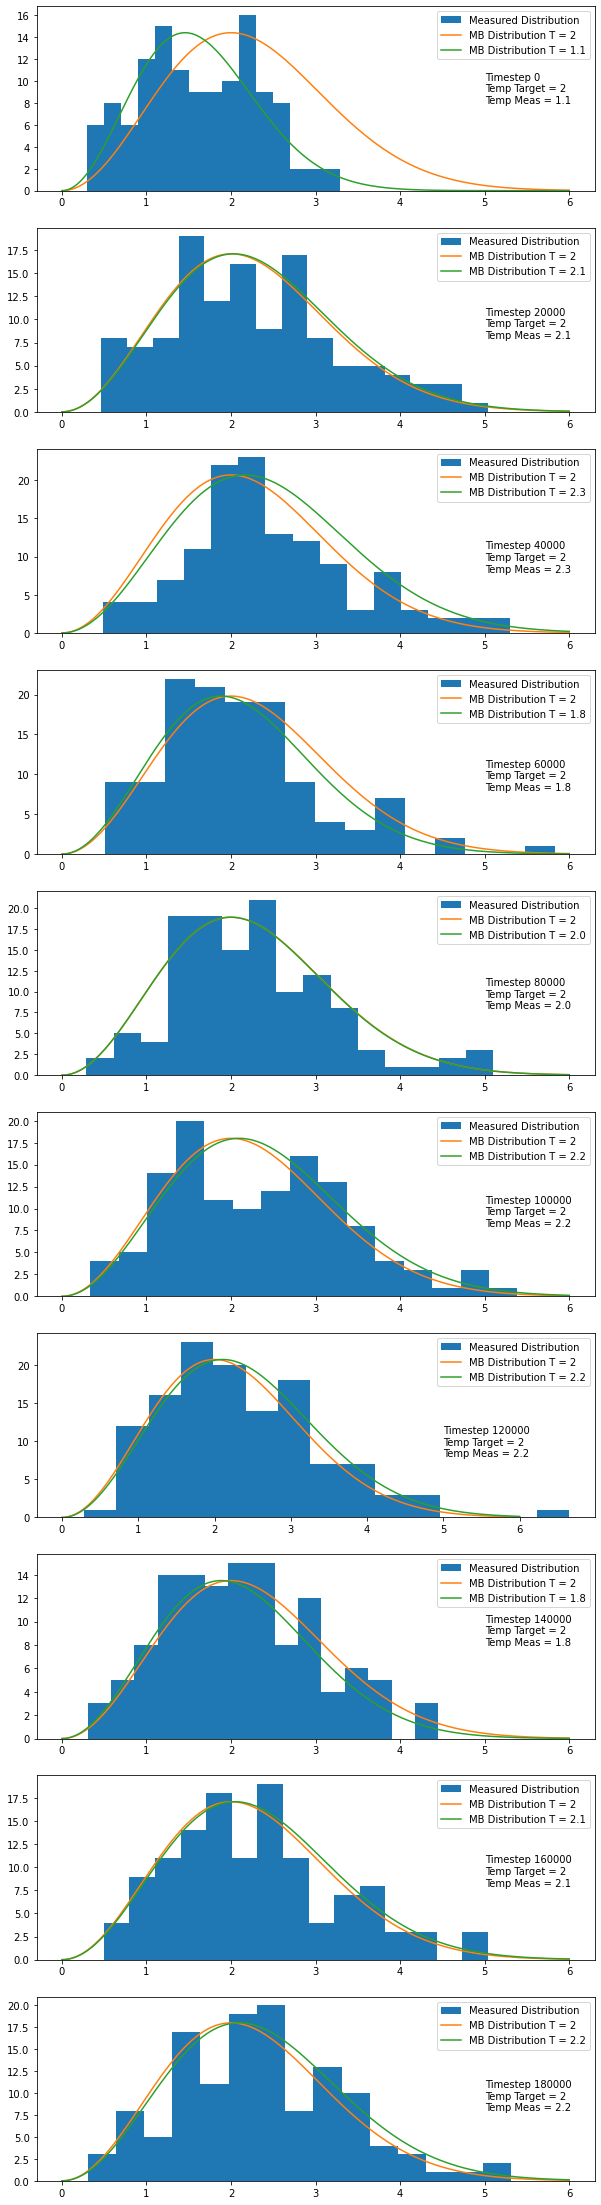

In [37]:
target_data = data_Q1000
target_data_speed = data_Q1000_speeds
fig,ax = plt.subplots(len(target_data_speed), 1, figsize=(10,40))
for i in range(len(target_data_speed)):
    n,_,_ = ax[i].hist(target_data_speed[i][1:],15, label="Measured Distribution")
    maxoccup = np.max(n)
    ax[i].plot(vs, mb_dis(vs, 2.)/(np.max(mb_dis(vs, 2.)))*maxoccup*0.9, label="MB Distribution T = 2")
    current_temp = target_data[int(target_data_speed[i][0]),1]
    ax[i].plot(vs, mb_dis(vs, current_temp)/(np.max(mb_dis(vs, current_temp)))*maxoccup*0.9, label=f"MB Distribution T = {current_temp:.2}")
    ax[i].text(5,8,f"Timestep {int(target_data_speed[i][0])}\nTemp Target = 2\nTemp Meas = {current_temp:.2}")
    ax[i].legend()

# Interpretation
One sees that the distribution is off by quite a bit in the initial state, which we expect (after all, we don't initialize according to the correct distribution). In further timesteps, the distribution becomes better (with a bit of a loving eye), but still seems to fluctuate heavily. The reason for this is the approach taken here: I only analyse individual states, and along with the small number of particles this implies strong fluctuations.

The correct approach would be to average the distribution over a long time.

# Notes
In order to observe equilibration in these simulations, it seems to be important that the system is rather dense. Only then do the particles see each other often enough for a system wide temperature to make sense within reasonable time. Defining a temperature for a system that consists of 10 tiny particles and spans from here to Jupiter makes little sense. 

Here, we have one particle per cube of sidelength ~1.5, with Lennard Jones extent $\sigma = 1$. In different terms, the linear system size is 7.5 and there are 125 particles in it.